Import necessary libs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib.country_lib1 import CoutriesDataValidator

In [9]:
happiness_df = CoutriesDataValidator.combine_df('./data/happiness_report_2015_2022/*.csv')

Preliminary data verification

In [10]:
print(happiness_df.info)
print(happiness_df.columns)

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  Happiness Rank      Country  \
0               0           0               1  Switzerland   
1               1           1               2      Iceland   
2               2           2               3      Denmark   
3               3           3               4       Norway   
4               4           4               5       Canada   
..            ...         ...             ...          ...   
141          1224         141             142    Botswana*   
142          1225         142             143      Rwanda*   
143          1226         143             144     Zimbabwe   
144          1227         144             145      Lebanon   
145          1228         145             146  Afghanistan   

                              Region Happiness Score Economy (GDP per Capita)  \
0                     Western Europe           7.587                  1.39651   
1                     Western Europe           7.561         

In [11]:
list_of_float_columns = ['Happiness Score', 'Economy (GDP per Capita)',
       'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0']
happiness_df = CoutriesDataValidator.clean_data(happiness_df, list_of_float_columns, columns_to_remove)
print(happiness_df)

     Happiness Rank      Country                           Region  \
0                 1  Switzerland                   Western Europe   
1                 2      Iceland                   Western Europe   
2                 3      Denmark                   Western Europe   
3                 4       Norway                   Western Europe   
4                 5       Canada                    North America   
..              ...          ...                              ...   
141             142     Botswana                                -   
142             143       Rwanda                                -   
143             144     Zimbabwe               Sub-Saharan Africa   
144             145      Lebanon  Middle East and Northern Africa   
145             146  Afghanistan                    Southern Asia   

     Happiness Score  Economy (GDP per Capita)  Family (Social Support)  \
0              7.587                   1.39651                  1.34951   
1              7.561 

In [12]:
happiness_df.isna().sum()

Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [13]:
grouped_data = happiness_df[['Country','Happiness Score']].groupby('Country').agg([min, max, 'mean'])
grouped_data

Happiness Score                 
                        min    max      mean
Country                                     
Afghanistan          2.4040  3.794  3.132237
Albania              4.5860  5.199  4.845213
Algeria              4.8870  6.355  5.419012
Angola               3.7950  4.033  3.872250
Argentina            5.9290  6.650  6.270962
...                     ...    ...       ...
Venezuela            4.7070  6.810  5.315900
Vietnam              5.0610  5.485  5.252812
Yemen                3.3550  4.197  3.688925
Zambia               3.7594  5.129  4.314300
Zimbabwe             2.9950  4.610  3.684025

[175 rows x 3 columns]

Correlation verification for an example year

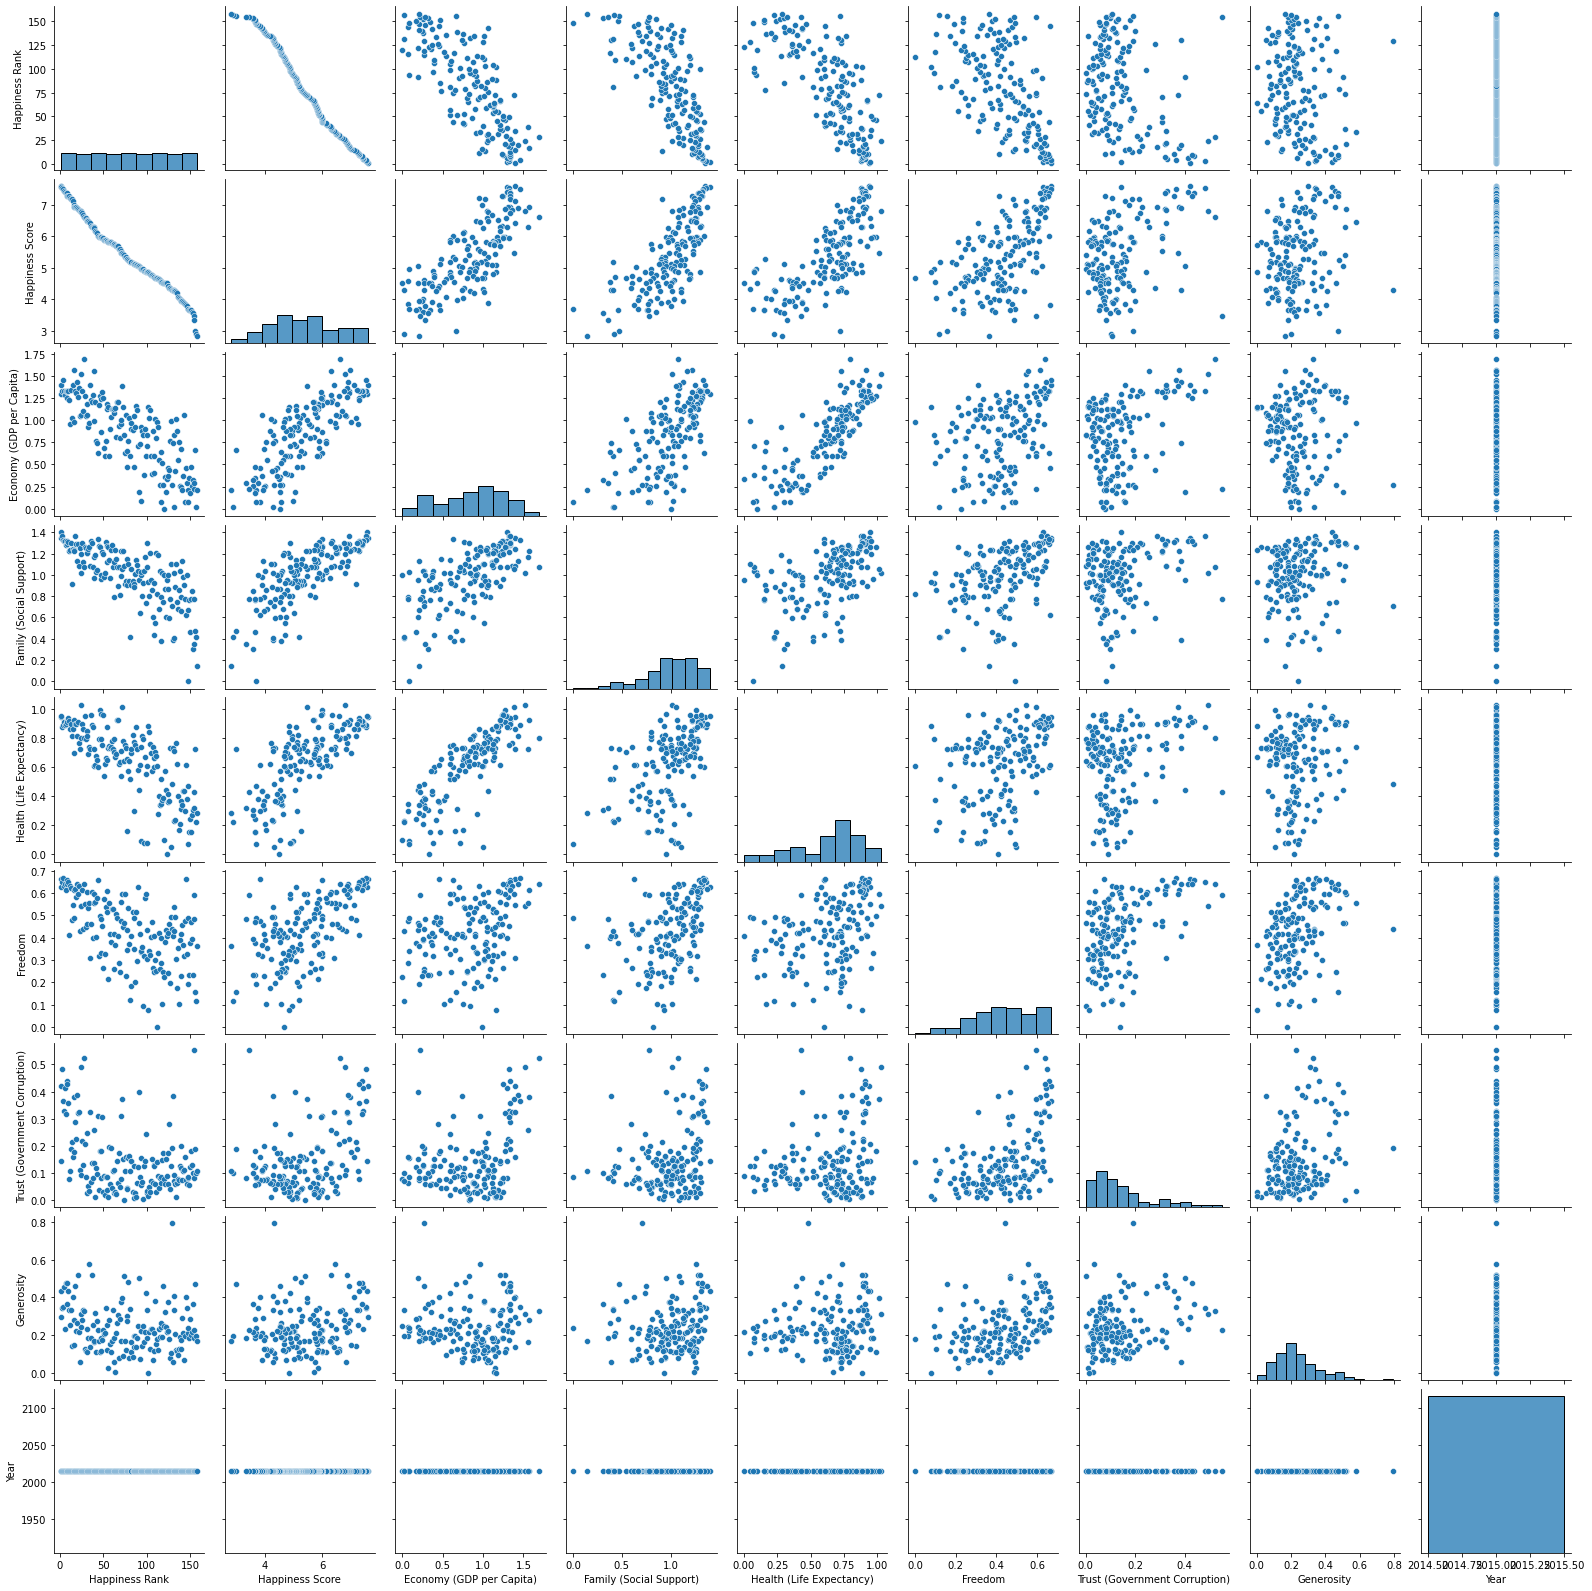

In [10]:
sns.pairplot(happiness_df[happiness_df['Year']==2015], kind="scatter")
plt.savefig('./data_collected/correlation_2015.png')

<AxesSubplot:>

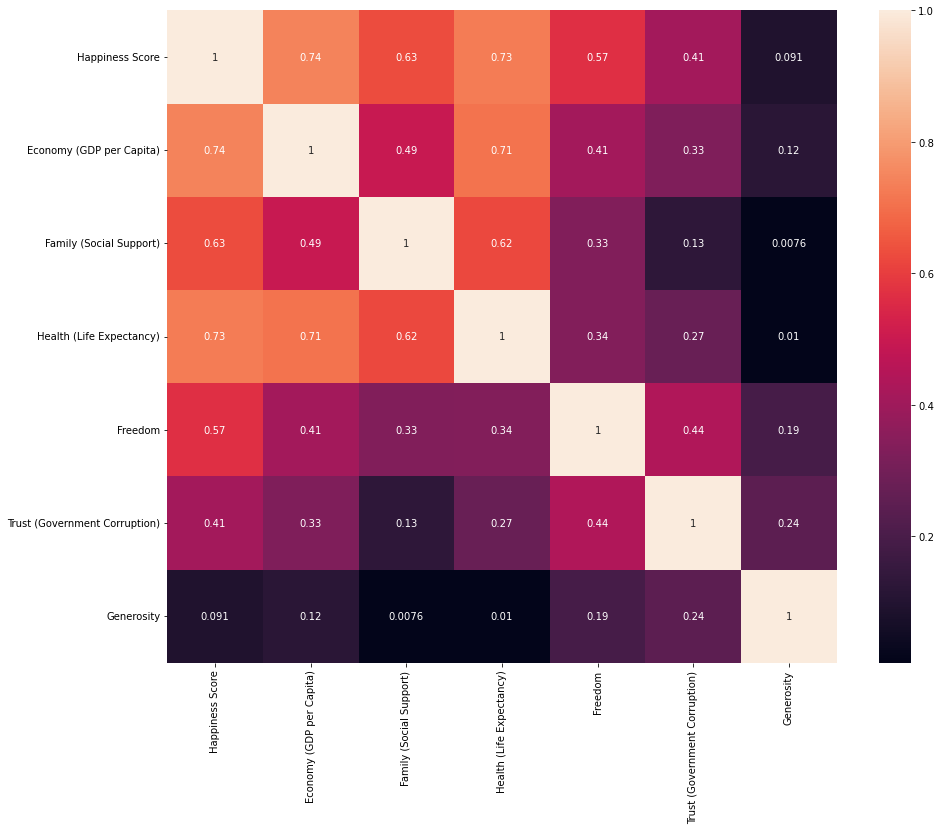

In [14]:
_, ax = plt.subplots(figsize=(15,12))
sns.heatmap(np.abs(happiness_df[['Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)',
                                              'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                                              'Generosity']].corr()), annot=True)

Correlations showed above points on Happiness dependence on Economy, Family, Health and Freedom

Diff column preparation to verify changes in Happiness Scores over the year

In [16]:
happiness_df['Diff'] = happiness_df.groupby('Country')['Happiness Score'].transform('max') - happiness_df.groupby('Country')['Happiness Score'].transform('min')
happiness_df

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Diff
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.1070
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.0670
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.1236
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.2290
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.4020
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,-,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,2022,0.8650
142,143,Rwanda,-,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,2022,0.2470
143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,2022,1.6150
144,145,Lebanon,Middle East and Northern Africa,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,2022,2.4030


In [18]:
group_diff = happiness_df[['Country', 'Diff']].groupby(['Country', 'Diff']).size().reset_index(name='sample_count')
group_diff

,Country,Diff,sample_count
0,Afghanistan,1.3900,8
1,Albania,0.6130,8
2,Algeria,1.4680,8
3,Angola,0.2380,4
4,Argentina,0.7210,8
...,...,...,...
170,Venezuela,2.1030,8
171,Vietnam,0.4240,8
172,Yemen,0.8420,8
173,Zambia,1.3696,8


Look into Countries with biggest differences in happiness scoring

In [21]:
biggest_diff = group_diff.sort_values(by='Diff', ascending=False).head(5)
print(biggest_diff)

         Country   Diff  sample_count
84       Lebanon  2.403             8
170    Venezuela  2.103             8
14         Benin  1.876             8
73   Ivory Coast  1.651             8
86       Liberia  1.627             8


['Lebanon', 'Venezuela', 'Benin', 'Ivory Coast', 'Liberia']

In [23]:
list_of_columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

Lebanon_df = happiness_df[happiness_df['Country']=='Lebanon'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Venezuela_df = happiness_df[happiness_df['Country']=='Venezuela'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Benin_df = happiness_df[happiness_df['Country']=='Benin'][list_of_columns].sort_values(by='Year').reset_index(drop=True)
Ivory_Coast_df = happiness_df[happiness_df['Country']=='Ivory Coast'][list_of_columns].sort_values(by='Year').\
reset_index(drop=True)
Liberia_df = happiness_df[happiness_df['Country']=='Liberia'][list_of_columns].sort_values(by='Year').reset_index(drop=True)

biggest_diff_countries  = {'Lebanon':Lebanon_df, 'Venezuela':Venezuela_df, 'Benin':Benin_df, 'Ivory Coast':Ivory_Coast_df,
                           'Liberia':Liberia_df}


Subplot for: Lebanon


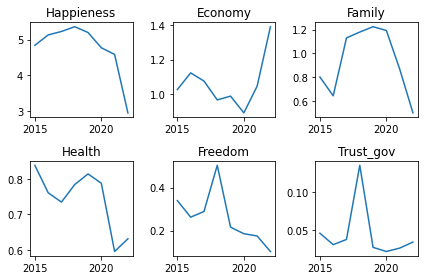

Subplot for: Venezuela


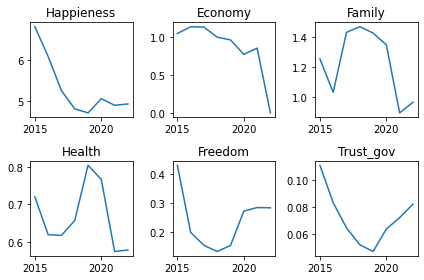

Subplot for: Benin


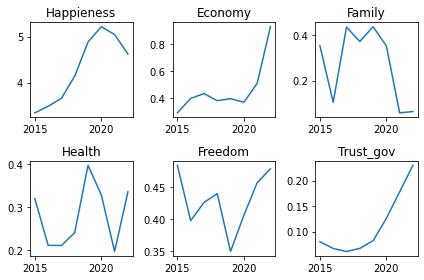

Subplot for: Ivory Coast


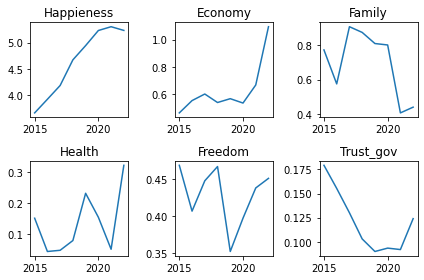

Subplot for: Liberia


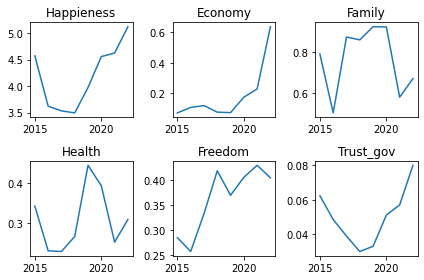

In [26]:
for country_name, country_df in biggest_diff_countries.items():
    print(f'Subplot for: {country_name}')
    CoutriesDataValidator.make_subplots_year_dependent(country_df)

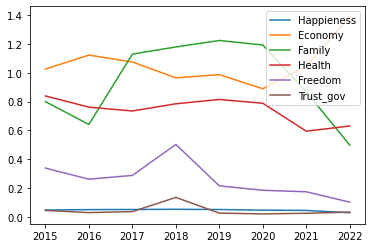

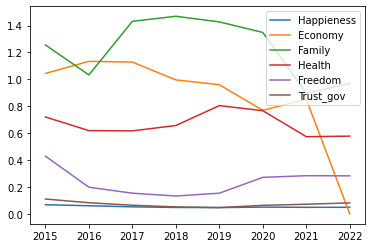

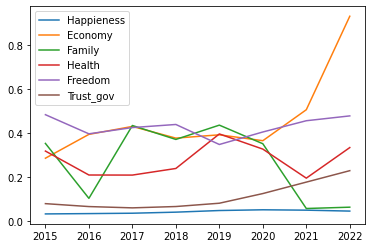

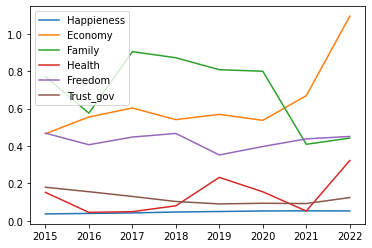

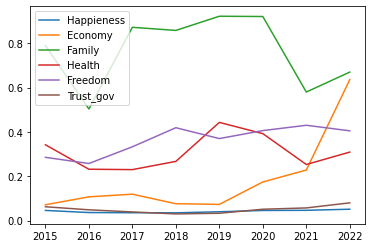

In [28]:
for country_name, country_df in biggest_diff_countries.items():
    country_df_modified = country_df
    country_df_modified['Happiness Score'] = country_df_modified['Happiness Score']/10
    CoutriesDataValidator.make_multiple_lines_plot(country_df_modified, country_name)